# Classification


<font color="blue"> Jayachandra reddy Kamineni </font>

# I. Overview (Introduction)

Objective of this Assignment is to build Classfication models using 4 different approaches and implement them on Classification data. Four models built in this Assignment are:

1. Pocket Algorithm
2. Quadratic discriminant analysis(QDA)
3. Linear discriminant analysis(LDA)
4. Logistic Regression

Data selected for Classification Analysis is "Adult cencus income". Below is the step by step process followed for building and implementation of Classification models.

1) Data Visualization

2) Preprocessing of the data

3) Review of 4 Classification models

4) Implementation of Pocket algorithm. Writing implementaion for abstract methods train(), use().

5) Implementation of QDA. Writing implementaion for abstract methods train(), use().

6) Implementation of LDA algorithm. Writing implementaion for abstract methods train(), use().

7) Implementation of Logistic regression algorithm. Writing implementaion for abstract methods train(), use().

8) Experiment Pocket algorithm, QDA, LDA, Logistic regression on Classification data.

    a) Preparing data, Dividing data into train set and test set
    b) Training model on train data
    c) Applying on train data 
    d) Applying on test data
    e) Evaluation metrics confusion matrix, precision, recall, specificity, roc auc score, accuracy, f1 score   
       are calculated
    f) Plots for results

9) Classification model comparision

10) Cross validation (Extra credit)
    


# II. Data



## Description

Data selected for Classification analysis is "Adult cencus income". This is a classification problem to predict whether income of person exceeds $50k/year based on cencus data. The dataset contains 15 columns and 32561 rows. It was extracted from 1994 cencus bureau database.

Description about attributes in dataset:

age: Age of person. It is continous.

workclass: Kind of organisation person is working in. Values in this column are Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education: Recent education completed by person. Values in this column are Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Education level completed by person. It is continuous.

marital-status: Marriage status of the person. Values in this column are Married-civ-spouse(Married civilian spouse), Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse(Married armed force spouse).

occupation: Occupation of the person. Values in this column are Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Relationship to spouse/family. Values in this column are Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: Race to which person belong to. Values in this column are White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: It is continuous.

capital-loss: It is continuous.

hours-per-week: No of hours person works in a week. It is continuous.

native-country: Native country of the person. Values in this column are United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Plots for understanding or analysis

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Reading data using pandas library 
adult_data=pd.read_csv("adult.csv")

In [3]:
# Summarise the data
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Descriptive statistics about data
adult_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Converting target variable into binary classifer(-1,1)
adult_data['income']=adult_data['income'].map({'<=50K': 0, '>50K': 1})
# Dataset has many cells with '?' as value. Below code is to drop the rows that has value '?'
adult_data = adult_data.replace({'?': np.nan}).dropna()
adult_data=adult_data.dropna()
adult_data = adult_data.reset_index(drop=True)

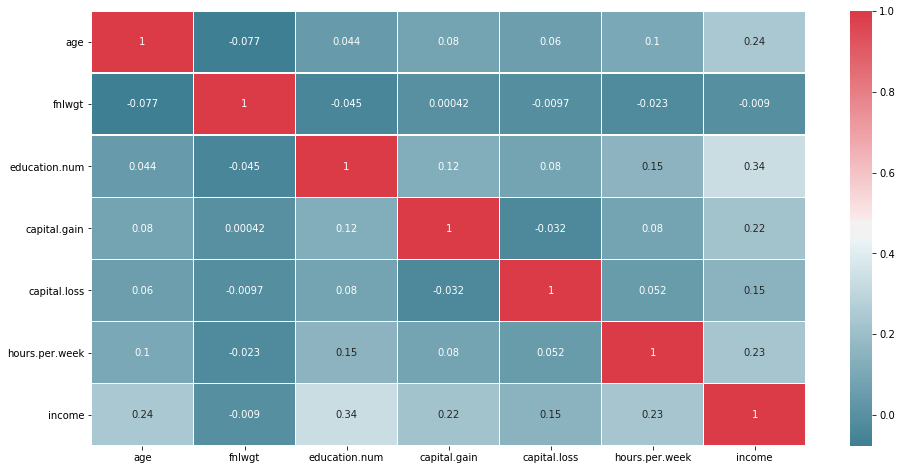

In [6]:
# Correlation heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = adult_data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cmap,linewidths=.5,annot=True)

Above correlation map indicates that income is positively correlated to education num, hours per week.

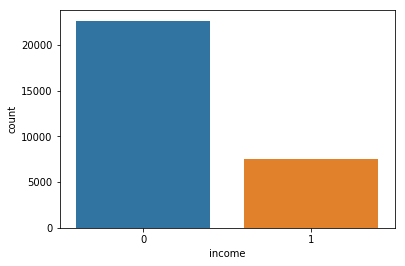

In [7]:
# Countplot of income
sns.countplot(adult_data['income'])

Above count plot indicates that number of people with salaries >50k are very less compared to <=50k.

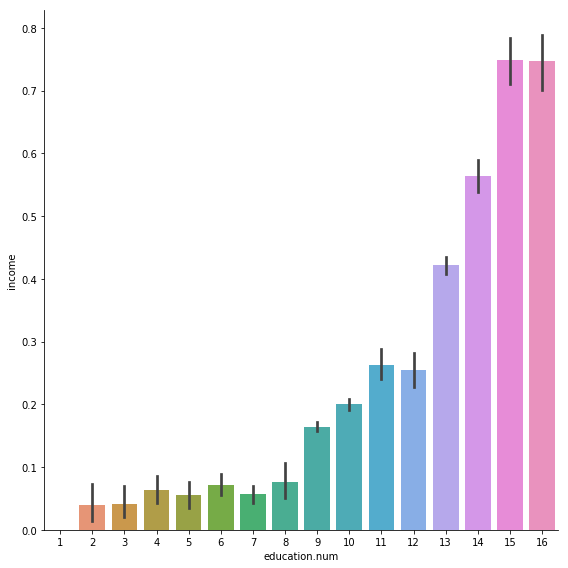

In [8]:
# Catplot between education number on x axis and income on y axis
sns.catplot(data=adult_data, x="education.num", y="income",kind='bar',height=8)

Above catplot tells that probability of people getting salary >50k is more for people with highest education number.

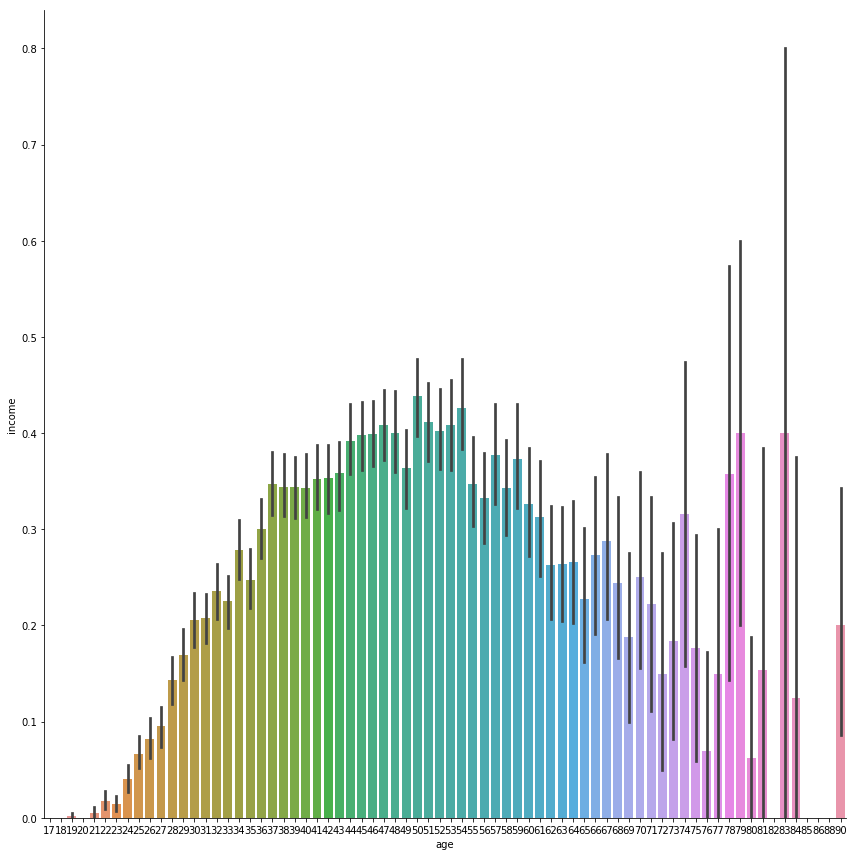

In [9]:
# Catplot between age on x axis and income on y axis
sns.catplot(data=adult_data, x="age", y="income",height=12,kind='bar')

Above plot indicates that salary distribution of people by age followed a normal distribution with age group 37 to 59 has more probability to earn >50k compared to others with some abnormalities in distribution from age 73.

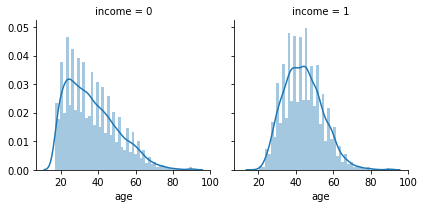

In [10]:
# Facetgrid plot with facets as income and age on x axis
g = sns.FacetGrid(adult_data, col="income") 
g.map(sns.distplot, "age")

From above facet grid KDE plot it is clear that people who earn <=50k are more dense in age group 20 to 30, people who earn >50k are dense in age group 35 to 50.

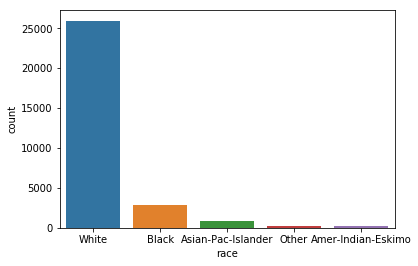

In [11]:
# Countplot of race 
sns.countplot(x='race',data=adult_data)

Above countplot indicates that white race people are more compared to other races.

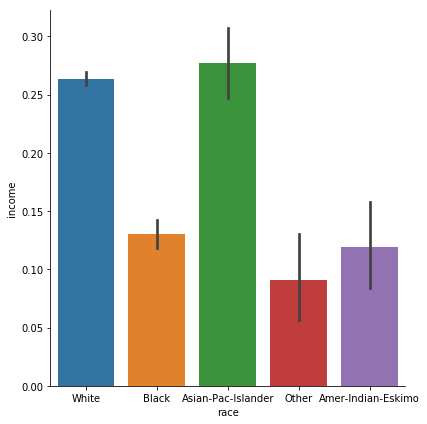

In [12]:
# Catplot between race on x axis and income on y axis
sns.catplot(data=adult_data, x="race", y="income",height=6,kind='bar')

Above catplot tells that Asian-Pac-Islander race people and white people are earning more compared to others. They are more probable of earning income >50k.

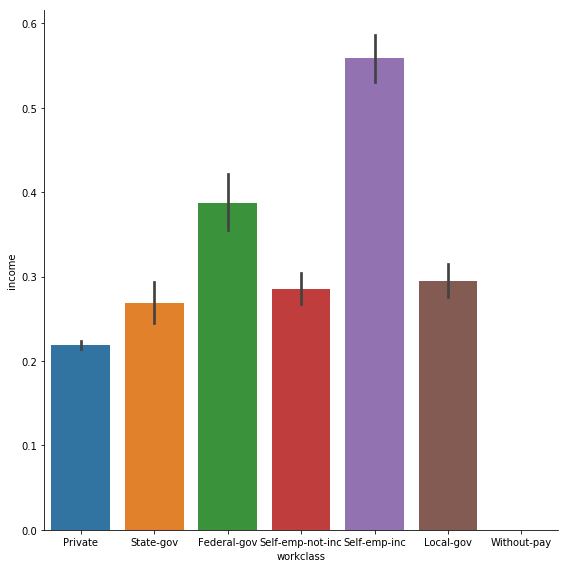

In [13]:
# Catplot between workclass on x axis and income on y axis
sns.catplot(data=adult_data, x="workclass", y="income",height=8,kind='bar')

Above catplot indicates that Self employed inc people are way more probable of earning >50k while people who work in private organisations earning the least.

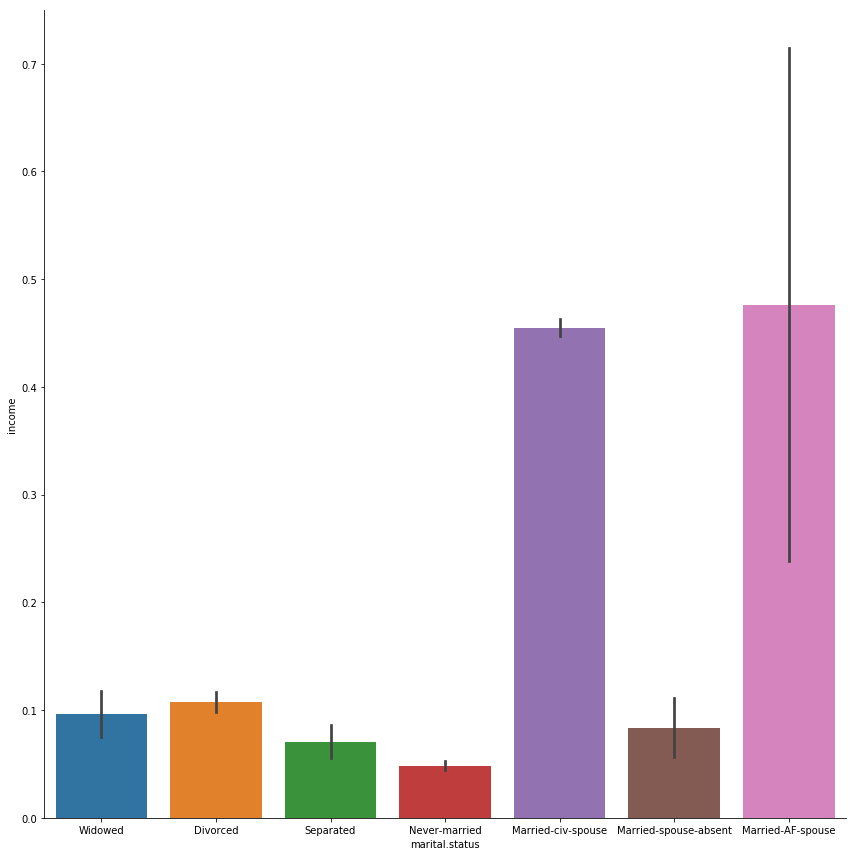

In [14]:
# Catplot between marital status on x axis and income on y axis
sns.catplot(data=adult_data, x="marital.status", y="income",height=12,kind='bar')

Above catplot indicates that people who married armedforce and civilian spouse earn lot while people who never married, seperated earning least.

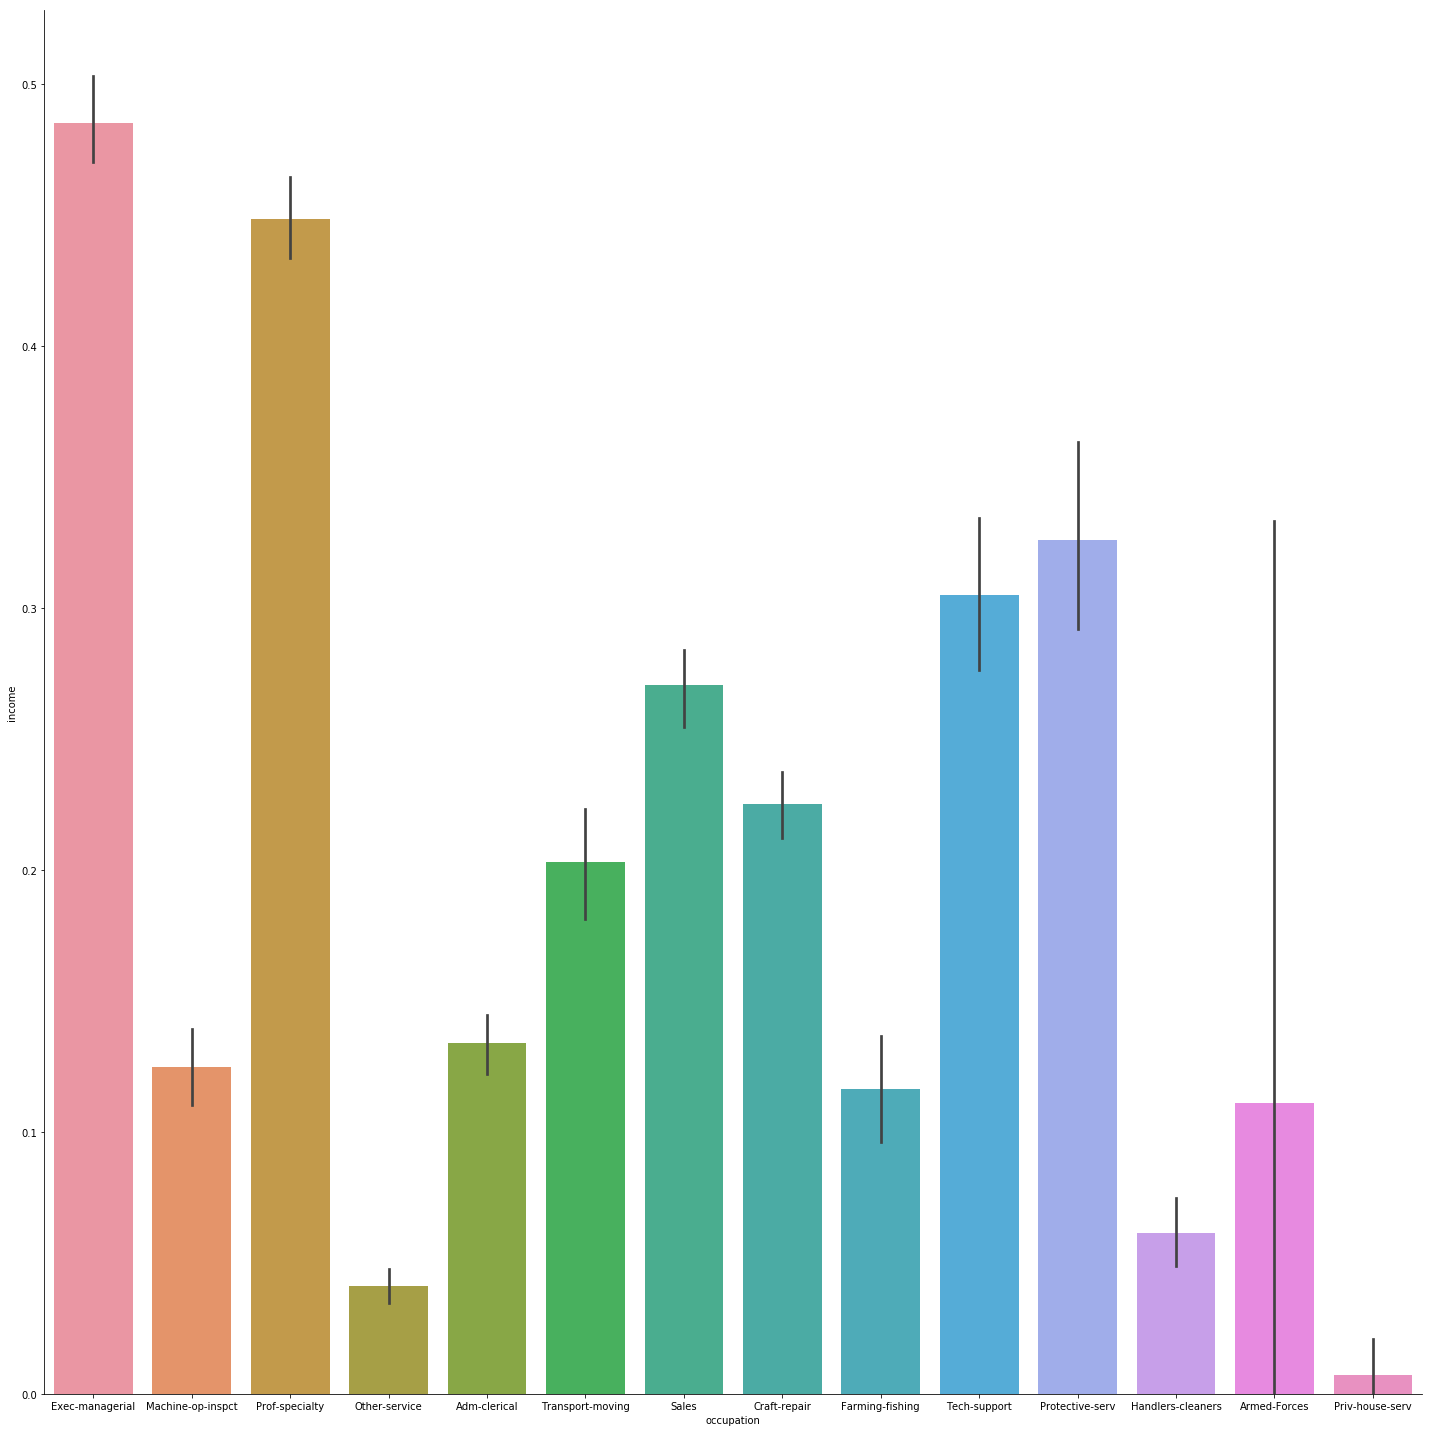

In [15]:
# Catplot between occupation on x axis and income on y axis
sns.catplot(data=adult_data, x="occupation", y="income",height=20,kind='bar')

Above catplot indicates that people with occupation as Executive managerial has most probability to earn >50k while people who work as private house servant are least probable of earning >50k.

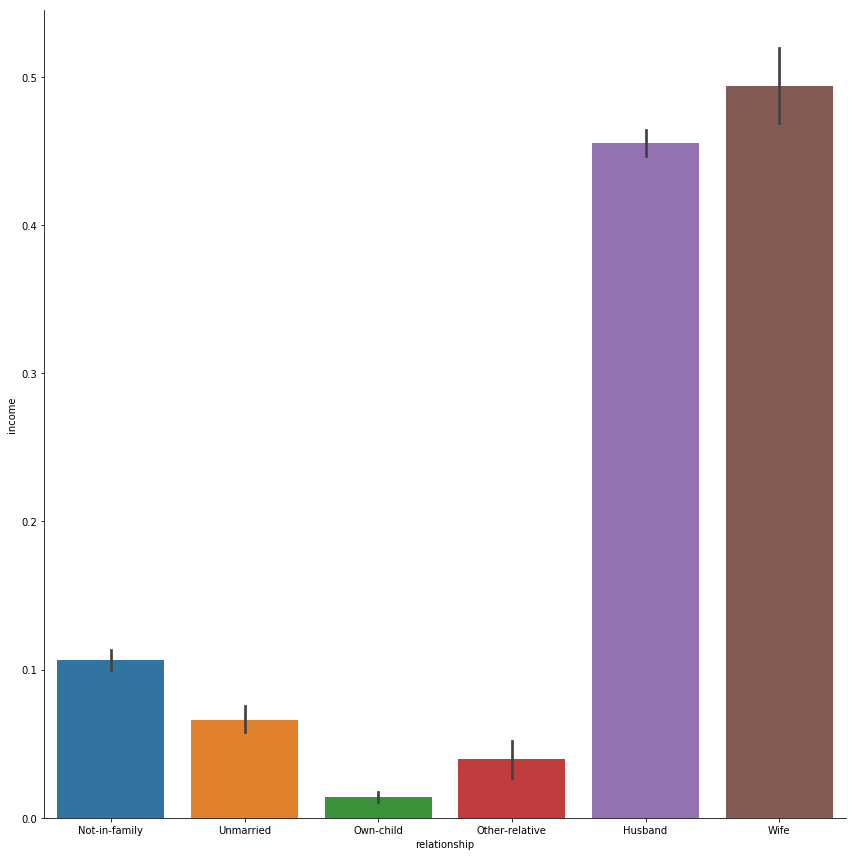

In [16]:
# Catplot between relationship on x axis and income on y axis
sns.catplot(data=adult_data, x="relationship", y="income",height=12,kind='bar')

Above catplot indicates that people who are either husband/wife are earning more while people who are unmarried and own child to their family are earning least.

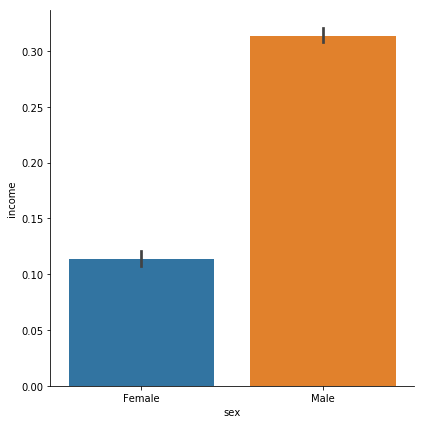

In [17]:
# Catplot between sex on x axis and income on y axis
sns.catplot(data=adult_data, x="sex", y="income",height=6,kind='bar')

Above catplot indicates that male gender are more probable of earning income >50k compared to female.

## Preliminary observation

Based on the visualizations these are the observations identified. Correlation map indicates that income is positively correlated to education num, hours per week. Number of people with salaries >50k are very less compared to <=50k. Probability of people getting salary >50k is increasing with their education num which means salary is directly proportional to education number. Salary distribution of people by age followed a normal distribution with age group 37 to 59 has more probability to earn >50k compared to others with some abnormalities in distribution from age 73. From visualization, people with age more than 73 are more probable of earning >50k. From KDE plot it is clear that people who earn <=50k are more dense in age group 20 to 30, people who earn >50k are dense in age group 35 to 50. Countplot indicates that white race people are more compared to other races. From visualizations it is clear that Asian-Pac-Islander race people and white people are earning more compared to others. They are more probable of earning income >50k. Self employed inc people are way more probable of earning >50k while people who work in private organisations earning least. Based on marital status people who married armedforce and civilian spouse earn lot while people who never married, seperated earning least. People whose occupation is Executive managerial has most probability to earn >50k while people who work as private house servant are least probable of earning >50k. People who are either husband/wife are earning more while people who are unmarried and own child to their family are earning least. Male gender are more probable of earning income >50k compared to female.

## Preprocessing of the data

In [18]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
adult_data=pd.read_csv("adult.csv")

# Dropping Unwanted Columns
adult_data=adult_data.drop(['education.num'],axis=1)
adult_data=adult_data.drop(['fnlwgt'],axis=1)
adult_data=adult_data.drop(['capital.gain'],axis=1)
adult_data=adult_data.drop(['capital.loss'],axis=1)
adult_data=adult_data.drop(['native.country'],axis=1)


# Converting target variable into binary classifer(0,1)
adult_data['income']=adult_data['income'].map({'<=50K': -1., '>50K': 1.})

# Dataset has many cells with '?' as value. Below code is to drop the rows that has value '?'
adult_data = adult_data.replace({'?': np.nan}).dropna()
adult_data=adult_data.dropna()
adult_data = adult_data.reset_index(drop=True)

#Encoding categorical variables
adult_data['sex']=lb.fit_transform(adult_data['sex'])
adult_data['education']=lb.fit_transform(adult_data['education'])
adult_data['workclass']=lb.fit_transform(adult_data['workclass'])
adult_data['marital.status']=lb.fit_transform(adult_data['marital.status'])
adult_data['relationship']=lb.fit_transform(adult_data['relationship'])
adult_data['race']=lb.fit_transform(adult_data['race'])
adult_data['occupation']=lb.fit_transform(adult_data['occupation'])



In [19]:
adult_data

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,82,2,11,6,3,1,4,0,18,-1.0
1,54,2,5,0,6,4,4,0,40,-1.0
2,41,2,15,5,9,3,4,0,40,-1.0
3,34,2,11,0,7,4,4,0,45,-1.0
4,38,2,0,5,0,4,4,1,40,-1.0
5,74,5,10,4,9,2,4,0,20,1.0
6,68,0,11,0,9,1,4,0,40,-1.0
7,41,2,15,4,2,4,4,1,60,1.0
8,45,2,10,0,9,4,2,0,35,1.0
9,38,4,14,4,9,1,4,1,45,1.0


# III. Method



### A. Super Classs Definition

In [20]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

## Summary of Classification models

#### Pocket algorithm:
Pocket algorithm is a variant of Perceptron algorithm. Perceptron algorithm applies a step function on the linear output. For classification, it iterate over the training samples, and update the weights in a way that would result in correct classification. Weights get updated over every iteration and  weights updated during last iteration will be final weights used for prediction. Weights of the last iteration may not be the best solution. To overcome this unstability of the Perceptron algorithm Pocket algorithm keeps the best solution so far in its pocket. w_pocket contains the best solution. Weights are updated using below equation:

w(k+1)=w(k)+α(ti)(xi)
,where α is learning rate

#### Discriminant Analysis: 

Discriminant Analysis models the distribution of each class seperately and uses Bayes theorem to calculate the probability of reponse category given input X. Assumes Gaussian model distribution for likelihood function. After pluggin Gaussian model we finally achieve the equation 
$$
P(T = k \mid x) = \frac{ \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k)} P(T = k)} { P(x) }.
$$

#### Quadratic Discriminant Analysis(QDA):

QDA is a type of bayesian classifier with quadratic decision boundary which is generated by fitting class conditional densities to the data and using Bayes’ rule. The model uses different covariance matrix for each class. It assumes higher posterior probability P(T=+1∣x) for the sample x with the positive label. Thus,
P(T=+1∣x)>P(T=−1∣x). Discriminant function is defined as 
$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

for a new sample x model can predict the label with
$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$


#### Linear Discriminant Analysis(LDA):

LDA is closely related to QDA. In QDA it is assumed that each class has different covariance matrix where as in LDA it is assumed same covariance matrix for all classes. Unifying the covariance matrix removes the quadratic term in discriminant function:This model generates linear decision boundary. Discriminant function is defined as
$$
\delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

for a new sample x model can predict the label with
$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

Few problems of QDA has given rise to LDA model. They are:

1) When data is undersampled, the resulting class boundary has high chance of overfitting.

2) Maintenance the covariance matrix is not cheap.

LDA model works best when training data is small and QDA is preferred when training data is large as assumption of a common covariance matrix is clearly untenable. 

#### Logistic Regression:

Linear regression model that directly predicts P(T=k∣x), not the class label k. This approach is known as Logistic Regression. Logistic regression uses an equation as the representation, very much like linear regression. This model outputs probability that instance belong to particular class. Based on the probabilities calculated if probability is greater then 50% it assign instance to that particular class else to other class. This makes Logistic regression binary classifier. Weights are updated with with the gradient 
$$
wv \leftarrow wv + \alpha Xm^\top \Big(  Tm - g(Xm)\Big).
$$
Weight w is not a vector any more. It is matrix with D+1×K dimensions, where K is number of classes, D is number of features in train data.


### B. Pocket Algorithm


In [21]:
from copy import deepcopy as copy 
import pandas as pd
class Pocket(Classifier): 
    
    
    def __init__(self):
        
        self.maxiter=5
        self.alpha=0.01
        self.w=None
        self.w_pocket=None
        
    @staticmethod   
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
        N=X.shape[0]
        self.w = np.zeros(X.shape[1])
        self.w_pocket=copy(self.w)
        print(self.w_pocket)
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
            ##### additional for pocket algorithm 
                    
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        print(self.w_pocket)
        
    def use(self, X):
        return np.sign(X @ self.w_pocket)
    

## Explanation of codes

BaseModel class has two abstract methods train(), use(). Any class that extends BaseModel class has to provide implementation for these abstract methods. Classifier class extends BaseModel class with functions again abstract. Classifier class provides three concrete methods normalize(), check_matrix(), add_ones(). check_matrix() checks if passed argument is 2D matrix or not, if not it raises the value error. add_ones() checks whether the matrix is 2D or not and if it is, it adds a column of 1s at the beginning of the matrix. normalize function standardize the input by calculating mean and standard deviation.

Pocket algorithm above is child class of Super class Classifier. So it has to provide implementation for two abstract methods train() and use(). In above algorithm train() function is used to train the model on train data and use() function is used to predict the class labels given test data. One more function compare() is used in train() function to compare weights. 

train() function takes X, T as arguments where X is an array of independent variables, T is target variable. First it initializes w(weights) to zero and copy to w_pocket(best weights so far). maxiter is the number of times data will be trained. For each iteration it updates the weight using equation w += alpha * T[k] * X[k] where alpha is learning rate. Then it calls compare() function to compare current weights to the weights in pocket. If current weights are better than w_pocket then it updates the w_pocket to w_current, else it continues iterations.

use() function takes test data X as input and predicts target variables using equation np.sign(X @ w_pocket)

### C. QDA


In [22]:
class QDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None
        self.prior1=None
        self.mu2=None
        self.Sigma2=None
        self.prior2=None
        self.d1=None
        self.d2=None
    @staticmethod    
    def QDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) + np.log(prior)
    
    
    def train(self,X_train,t):
        sc=self.normalize(X_train)
        scaled_df = pd.DataFrame(sc, index=X_train.index, columns=X_train.columns)
        scaled_df['income']=t
        X1=scaled_df[scaled_df.income == -1.0]
        X1=X1.drop(['income'],axis=1)
        X2=scaled_df[scaled_df.income == 1.0]
        X2=X2.drop(['income'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)

        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)

        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.prior1 = N1 / (N1+N2)
        self.prior2 = N2 / (N1+N2)
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.QDA(Xtest,np.matrix(self.mu1),self.Sigma1,self.prior1),self.QDA(Xtest,np.matrix(self.mu2),self.Sigma2,self.prior2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2
        

## Explanation of codes

QDA algorithm above is child class of Super class Classifier. This class has implementation for train() and use() methods. It also has one concrete method QDA() which is used to calculate the discriminant value for each class.

train() function takes X,T as input. Here X is train data and T is target variables of train data. Inside the train() function it divides the data into seperate parts based on its target variables. In my case it divides data into X1, X2 where X1 is data with +1 label and X2 is the data with -1 label. From this data it calculates mu1, mu2, Sigma1, Sigma2, prior1, prior2 for respective classes. 

use() fucntion takes test data X as input and normalizes it. It then calculates discriminant values which are the likely of getting either of the classes by calling QDA() function. QDA() fuction calculates discriminant values using the equation 

-0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) + np.log(prior)

### D. LDA

In [23]:
class LDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma=None
        self.prior1=None
        self.mu2=None
        
        self.prior2=None
        self.d1=None
        self.d2=None
    @staticmethod    
    def LDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)
    
    
    def train(self,X_train,t):
        sc=self.normalize(X_train)
        scaled_df = pd.DataFrame(sc, index=X_train.index, columns=X_train.columns)
        scaled_df['income']=t
        X1=scaled_df[scaled_df.income == -1.0]
        X1=X1.drop(['income'],axis=1)
        X2=scaled_df[scaled_df.income == 1.0]
        X2=X2.drop(['income'],axis=1)
        
        
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))
        

        
        
        self.Sigma = np.cov(sc.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.prior1 = N1 / (N1+N2)
        self.prior2 = N2 / (N1+N2)
        
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.LDA(Xtest,self.mu1,self.Sigma,self.prior1),self.LDA(Xtest,self.mu2,self.Sigma,self.prior2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

## Explanation of codes

LDA class above is child class of Classifier class. It provides implementation for train() and use() functions. It has other concrete function LDA() which claculates discriminant values. 

train() function takes X,T as input. Here X is train data and T is target variables of train data. Inside the train() function it divides the data into seperate parts based on its target variables. In my case it divides data into X1, X2 where X1 is data with +1 label and X2 is the data with -1 label. From this train data it calculates mu1, mu2, prior1, prior2, Sigma.

use() fucntion takes test data X as input and normalizes it. It then calculates discriminant values which are the likely of getting either of the classes by calling LDA() function. LDA() fuction calculates discriminant values using the equation

np.sum(np.dot(X, sigma_inv) * mu  - 0.5 * np.dot(mu, sigma_inv) * mu  + np.log(prior), axis=1)

### E. Logistic Regression

In [24]:
class Logistic(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        
    """
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
       
        return self.softmax(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)

       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

## Explanation of codes

Logistic Regression algorithm above is child class of Classifier class. It provides implementation for train(), use() functions. It has 2 other concrete methods softmax(), g(). softmax() function generalizes the logistic sigmoid fuunction. 

train() function takes input matrices X, T. It calculates values of D, K where D is number of features, K is number of unique classes in T. Then it intializes zeros to weights matrix of (D+1,K) shape. It adds column of ones to X and modify shape of T to required format N×K. niter is number of times data has to be trained. For each iteration weights matrix gets updated using equation w += alpha * X.T @ (T - ys) where alpha is learning rate, ys is softmax(X @ w).

use() function takes test data X as input. It first normalizes it and add ones column to X. It then calculates output variable using softmax function on dot product of Xs and weights matrix.

# IV. Experiments


## Pocket Algorithm

In [25]:
# Dividing data into train set and test set
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
t=adult_data['income']
adult_data_p=adult_data.drop(['income'],axis=1)
X_train,X_test,y_train,y_test = model_selection.train_test_split(adult_data_p,t,test_size=0.30,random_state=40)

In [26]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

### Training on train data

In [27]:
pocket=Pocket()
pocket.train(X_train,y_train)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  4
[ 0.02644608  0.03848164  0.00814509  0.00310894  0.00431723 -0.00234829
 -0.00039268  0.01480198  0.05275398]


### Accuracy,F1 score on train data

In [28]:
# Predicting on train set
ypred_train=pocket.use(X_train)

In [29]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_train,ypred_train))
print('F1 score:', f1_score(y_train,ypred_train))

Accuracy: 0.6505906427309087
F1 score: 0.506210976010516


### Classifying on test data

In [30]:
# Predicting on test set
ypred_p=pocket.use(X_test)

## Evaluation metrics

#### Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, ypred_p)
cf

array([[4337, 2654],
       [ 620, 1605]], dtype=int64)

In [32]:
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

#### Precision

In [33]:
precision=(TP/(TP+FP))
precision

0.37684902559286215

#### Recall

In [34]:
recall=TP/(TP+FN)
recall

0.7213483146067415

#### Specificity

In [35]:
specificity=TN/(TN+FP)
specificity

0.6203690459161779

#### ROC AUC score

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_p)

0.6708586802614597

#### Accuracy,F1 score

In [37]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test,ypred_p))
print('F1 score:', f1_score(y_test,ypred_p))

Accuracy: 0.6447482638888888
F1 score: 0.4950647748303516


### Plots for results

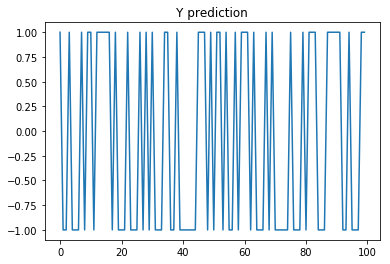

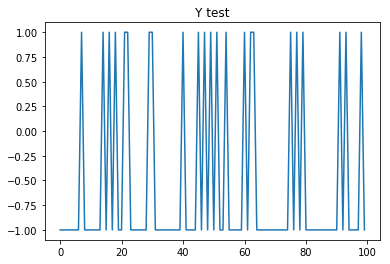

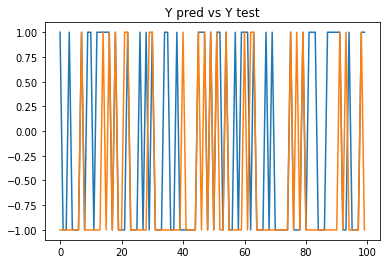

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Y prediction")
plt.plot(ypred_p[0:100])
plt.show()
plt.title("Y test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_p[0:100])
plt.plot(y_test[0:100])
plt.show()

From above 3 plots we can identify the pattern how actual test data is and how our model has predicted. 

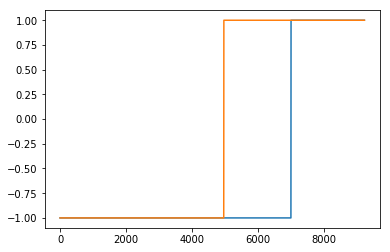

In [39]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(ypred_p))

From above plot we can see that our model has predicted more positives than they actually are.

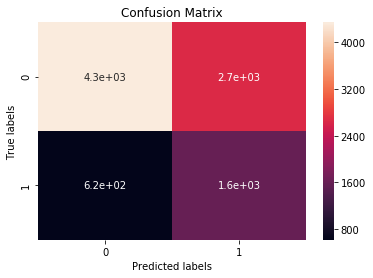

In [40]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

From above plot of confusion matrix we can visually identify which cell has more values. There are more true negatives and less false negatives.

In [41]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_p)
roc_auc = auc(false_positive_rate, true_positive_rate)

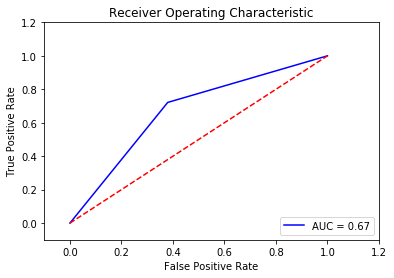

In [42]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Above plot is true positive rate against false positive rate at various thresholds.

In [43]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) 

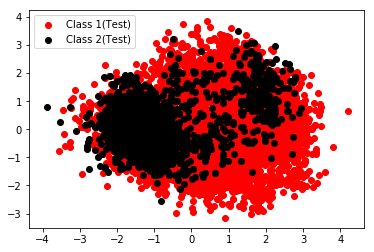

In [44]:
transformed = pd.DataFrame(pca.fit_transform(X_test))
t0 = np.array(y_test==-1)
t1 = np.array(y_test==1)
plt.scatter(transformed[t0][0], transformed[t0][1], label='Class 1(Test)', c='red')
plt.scatter(transformed[t1][0], transformed[t1][1], label='Class 2(Test)', c='black')
plt.legend()

Above plot is of test data that is dimensionally reduced using PCA. Black colour defines actual positive class, Red colour defines actual negative class. 

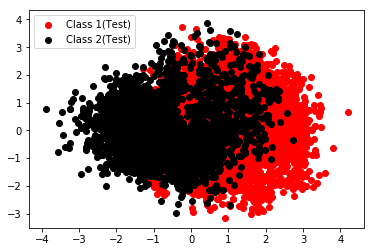

In [45]:
transformed = pd.DataFrame(pca.fit_transform(X_test))
t0 = np.array(ypred_p==-1)
t1 = np.array(ypred_p==1)
plt.scatter(transformed[t0][0], transformed[t0][1], label='Class 1(Test)', c='red')
plt.scatter(transformed[t1][0], transformed[t1][1], label='Class 2(Test)', c='black')
plt.legend()

Above plot is of test data that is dimensionally reduced using PCA. Black colour defines predicted positive class, Red colour defines predicted negative class. 

By comparing this plot with above plot we can see that there is more dense of black points in middle of plot which means model has predicted more postives than they are.

### Discussion about Evaluation metrics

Confusion matrix, Precision, Recall, Specificity, ROC AUC Score, Accuracy, F1 scores are calcuated for the models. 

- **Confusion matrix**

It is matrix which represents rows as actual values and columns as prediction values. 

  | - | + 
 --|--|--
 - | True Negative (TN) | False Positive (FP)
 + | False Negative (FN)| True Positive (TP)
 
 - **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

- **ROC AUC Score**

The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). For the ROC curve, AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve. 


- **Accuracy**

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

- **F1 Score**

It is harmonic mean of precision and recall. 

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

F1 score favors the similar precision and recall values. 

#####  Pocket algorithm:

Confusion matrix:  array([[4410, 2581],[ 668, 1557]], dtype=int64)
       
Precision: 0.37

Recall: 0.72

Specificity: 0.62

ROC AUC Score: 0.67

Accuracy: 0.64

F1 score: 0.49

Pocket algorithm seems to work well given AUC score of 0.67, F1 score 0.49. Our data is imbalanced and prediction of both classes is equally important to us. So evaluating the model by F1 score, AUC score is meaningful. As most of our data is composed of negative samples we get low precision value. Using accuracy for evaluating the model is not a good idea for imbalanced data.

Precision calculates out of those predicted positives, how many of them are actual positives. Precision is used when costs of false positives are high. We use Recall(True positive rate) to find the correctness of postive class with actual positive class. We will use Specifictiy (True Negative rate) if we need to find about the correctness of negative classes. 


### Discussion about Train and Test accuracies

Train accuracy: 0.65, Train F1: 0.50

Test accuracy: 0.64, Test F1: 0.49

From above results we can say that our model is working similarily both on train and test data. It is not overfitting the data. Model is not underfitting as model achieves good accuracy on both train and test.

## QDA

In [46]:
# Dividing data into train set and test set
from sklearn import model_selection
from sklearn.metrics import r2_score
t=adult_data.iloc[:,-1]
adult_data_d=adult_data.drop(['income'],axis=1)
X_train,X_test,y_train,y_test = model_selection.train_test_split(adult_data_d,t,test_size=0.20,random_state=40)


In [47]:
# Training
qda1=QDA1()
qda1.train(X_train,y_train)

### Accuracy,F1 score on train data

In [48]:
ypred_qda_train,d1,d2=qda1.use(X_train)

In [49]:
print(d1)
print(d2)

[-7.53887177 -3.23137677 -3.96995361 ... -3.40986315 -6.15250373
 -7.26590227]
[-14.64787078 -10.70757634 -12.54310583 ... -11.58916619 -10.131019
  -4.91878129]


In [50]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_train,ypred_qda_train))
print('F1 score:', f1_score(y_train,ypred_qda_train))

Accuracy: 0.7589322047692684
F1 score: 0.607993647432504


### Classifying on test data

In [51]:
ypred_qda_test,d1,d2=qda1.use(X_test)

In [52]:
print(d1)
print(d2)

[-3.12291566 -3.1181716  -3.30626981 ... -2.60282869 -6.09202116
 -4.64323959]
[ -4.02888512 -10.50175337  -1.84152106 ...  -9.31983621 -15.37110137
 -13.32665413]


### Evaluation metrics

#### Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, ypred_qda_test)
cf

array([[3510, 1144],
       [ 386, 1104]], dtype=int64)

In [54]:
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

#### Precision

In [55]:
precision=(TP/(TP+FP))
precision

0.49110320284697506

#### Recall

In [56]:
recall=TP/(TP+FN)
recall

0.7409395973154362

#### Specificity

In [57]:
specificity=TN/(TN+FP)
specificity

0.7541899441340782

#### ROC AUC Score

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_qda_test)

0.7475647707247572

#### Accuracy,F1 score

In [59]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
print('Accuracy:', accuracy_score(np.array(y_test), ypred_qda_test))
print('F1 score:', f1_score(np.array(y_test), ypred_qda_test))

Accuracy: 0.7509765625
F1 score: 0.5906902086677367


### Plots for results

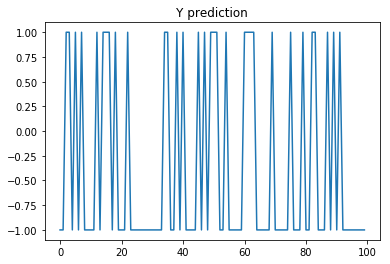

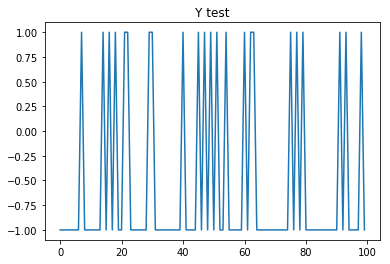

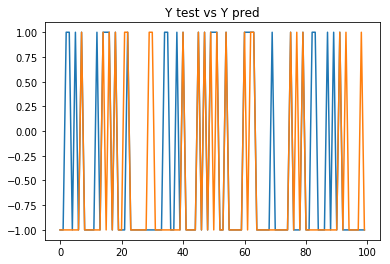

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Y prediction")
plt.plot(ypred_qda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_qda_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

From above 3 plots we can identify the pattern how actual test data is and how our model has predicted.

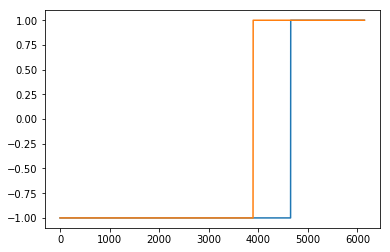

In [61]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(ypred_qda_test))

From above plot we can see that model has predicted more positives than they actually are.

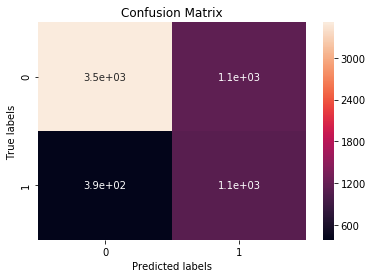

In [62]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

From above plot of confusion matrix we can visually identify which cell has more values. There are more true negatives and less false negatives.

In [63]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_qda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

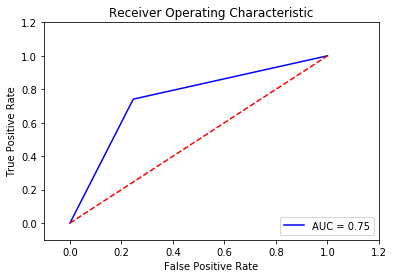

In [64]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Above plot is true positive rate against false positive rate at various thresholds.

In [65]:
# Using on 625 values of test data for plotting d1,d2
p,d1_p,d2_p = qda1.use(X_test[:625])

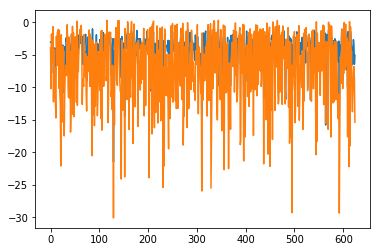

In [66]:
# Plots of d1,d2
plt.plot(d1_p)
plt.plot(d2_p)

Above figure is plot of two discriminant functions for each sample. Orange implies discriminant for positive label and blue implies discriminant for negative label.

Text(0.5,0.92,'QDA Discriminant Functions')

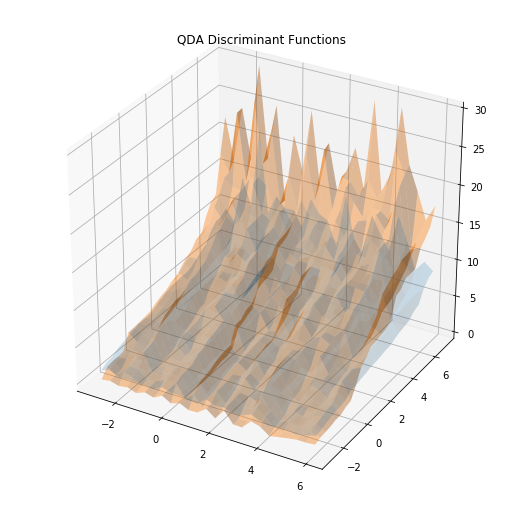

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-3,6, 25), np.linspace(-3,7, 25))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

Above plot is discriminant function in 3d axes.

Text(0.5,1,'Decision Boundary')

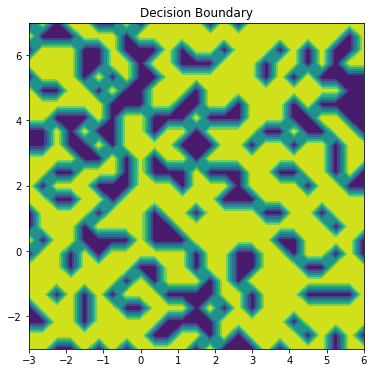

In [68]:
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

Above plot is a decision boundary for two classes

Text(0.5,1,'Decision Boundary')

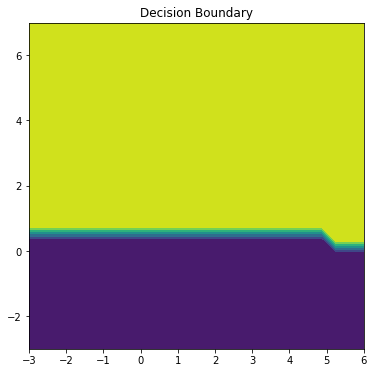

In [69]:
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

Above plot is decision boundary for two classes after sorting discriminant values.

Text(0.5,0,'QDA P(x|Class=k)\n from disc funcs')

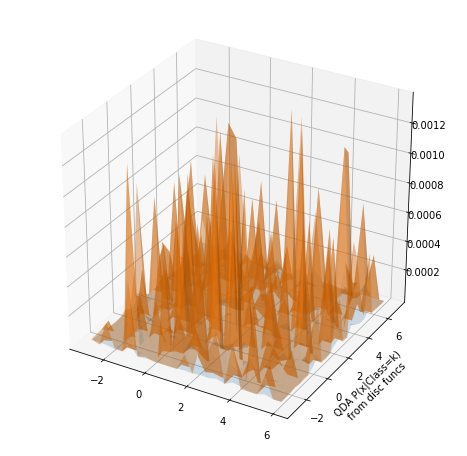

In [70]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda1.prior1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda1.prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

### Discussion about Evaluation metrics

##### QDA:

Confusion matrix: array([[3510, 1144],[ 386, 1104]], dtype=int64)

Precision: 0.49

Recall: 0.74

Specificity: 0.75

ROC AUC Score: 0.74

Accuracy: 0.75

F1 score: 0.59

QDA model works very good on test data. Even though sample is very imbalanced with most of the samples negative target this model has achieved a good precision score of 0.49. It has achieved a AUC score of 0.74, F1 score of 0.59 which implies its woking good on test data. 

### Discussion about Train and Test accuracies

Train accuracy: 0.75, Train F1: 0.60

Test accuracy: 0.75, Test F1: 0.59

From above results we can say that our model is working well both on train data and test data. Its working similarily on both the data without any overfitting. Model doesn't underfit as it is achieving good results.

## LDA

In [71]:
lda1=LDA1()

In [72]:
lda1.train(X_train,y_train)

### Accuracy,F1 score on train data

In [73]:
ypred_lda_train,d1,d2=lda1.use(X_train)

In [74]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_train,ypred_lda_train))
print('F1 score:', f1_score(y_train,ypred_lda_train))

Accuracy: 0.7493285586392122
F1 score: 0.0


C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Classifying on test data

In [75]:
ypred_lda_test,d1,d2=lda1.use(X_test)

### Evaluation metrics

#### Confusion matrix

In [76]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, ypred_lda_test)
cf

array([[4654,    0],
       [1490,    0]], dtype=int64)

In [77]:
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

#### Precision

In [78]:
precision=TP/(TP+FP)
precision

C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  """Entry point for launching an IPython kernel.


nan

#### Recall

In [79]:
recall=TP/(TP+FN)
recall

0.0

#### Specificity

In [80]:
specificity=TN/(TN+FP)
specificity

1.0

#### ROC AUC Score

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_lda_test)

0.5

#### Accuracy,F1 score

In [82]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.7574869791666666
F1 score: 0.0


C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Plots for results

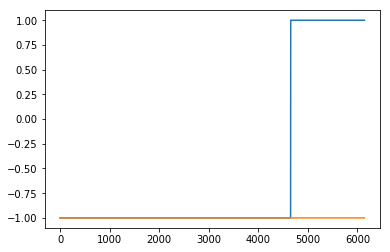

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.sort(y_test))
plt.plot(np.sort(ypred_lda_test))

From above plot we can see that model has predicted all data as -1.

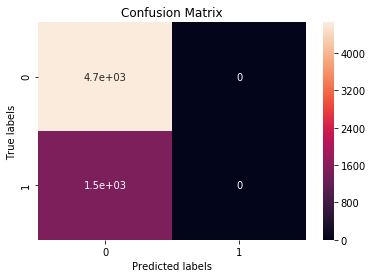

In [84]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

From above plot of confusion matrix we can visually identify which cell has more values. There are more true negatives.

In [85]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

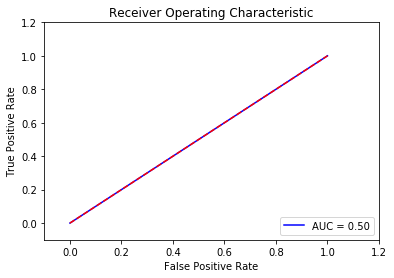

In [86]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Above plot is ROC curve. As the model is performing worst value of AUC is 0.50.

In [87]:
# Using on 625 values of test data for plotting d1,d2
p,d1_p,d2_p = lda1.use(X_test[:625])

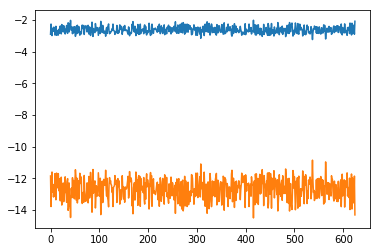

In [88]:
plt.plot(d1_p)
plt.plot(d2_p)

Above figure is plot of two discriminant functions. Orange implies discriminant for positive label and blue implies discriminant for negative label.

Text(0.5,0.92,'QDA Discriminant Functions')

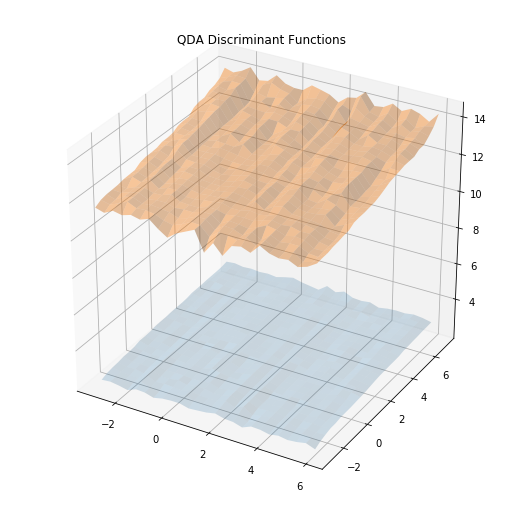

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-3,6, 25), np.linspace(-3,7, 25))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

Above plot is discriminant functions in 3d axes

Text(0.5,1,'Decision Boundary')

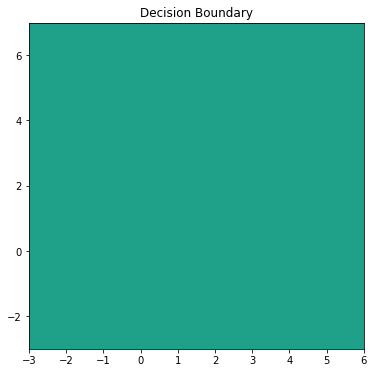

In [90]:
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

Above plot is decision boundary with only one whole colour because model predicting only one label.

Text(0.5,0,'QDA P(x|Class=k)\n from disc funcs')

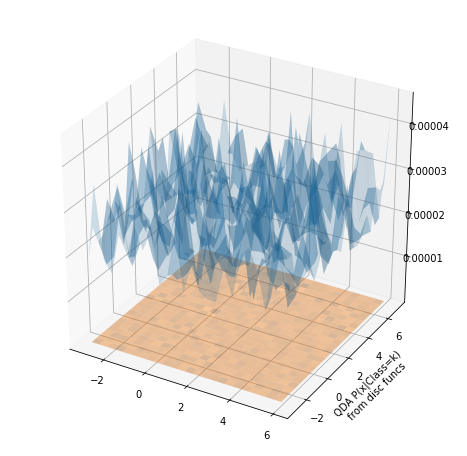

In [91]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda1.prior1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda1.prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

### Discussion about Evaluation metrics

Confusion matrix: array([[4654,    0],[1490,    0]], dtype=int64)

Precision: nan

Recall: 0.0

Specificity: 1.0

ROC AUC Score: 0.5

Accuracy: 0.75

F1 score: 0.0

By looking at the above results we can see that LDA has poorly predicted the target variables. It has got AUC score of 0.5 which is minimum for any random model and F1 score of 0.0. It is predicting all the test data as -1 label. Reason for this may be due to imbalanced data and we have considered single covariance for whole data.

### Discussion about Train and Test accuracies:

Train accuracy: 0.74, Train F1: 0

Test accuracy: 0.75, Test F1: 0

This model is working similarily both on train data and test data. It has F1 score of 0 for both of them which means its predicting only one output class for data. 

## Logistic Regression

In [92]:
y=adult_data['income']
adult_data_lr=adult_data.drop(['income'],axis=1)
from sklearn import model_selection
from sklearn.metrics import r2_score
lr = Logistic(0.0001)
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(adult_data_lr, y,test_size=0.20,random_state=42)

In [93]:
lr.train(XTrain[:],np.array(YTrain[:]))

### Accuracy,F1 score on train data

In [94]:
ypred_lr_train = lr.use(XTrain[:])

In [95]:
ypred_lr_train = np.argmax(ypred_lr_train, 1)
print(ypred_lr_train)
y_train=np.array(YTrain)
y_train=np.where(YTrain==-1,0,1)
print(y_train)

[1 0 0 ... 0 1 0]
[1 0 0 ... 1 0 0]


In [96]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_train, ypred_lr_train))
print('F1 score:', f1_score(y_train, ypred_lr_train))

Accuracy: 0.756490599820949
F1 score: 0.2943396226415095


### Classifying on test data

In [97]:
ypred_lr_test = lr.use(XTest[:])

In [98]:
ypred_lr_test

array([[0.83554098, 0.16445902],
       [0.65194364, 0.34805636],
       [0.81258156, 0.18741844],
       ...,
       [0.8000936 , 0.1999064 ],
       [0.67387628, 0.32612372],
       [0.88406643, 0.11593357]])

In [99]:
ypred_lr_test = np.argmax(ypred_lr_test, 1)
print(ypred_lr_test)
y_test=np.array(YTest)
y_test=np.where(YTest==-1,0,1)
print(y_test)

[0 0 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


### Evaluation metrics

#### Confusion matrix

In [100]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, ypred_lr_test)
cf

array([[4367,  272],
       [1178,  327]], dtype=int64)

In [101]:
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

#### Precision

In [102]:
precision=(TP/(TP+FP))
precision

0.5459098497495827

#### Recall

In [103]:
recall=TP/(TP+FN)
recall

0.21727574750830564

#### Specificity

In [104]:
specificity=TN/(TN+FP)
specificity

0.9413666738521232

#### ROC AUC Score

In [105]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_lr_test)

0.5793212106802145

#### Accuracy,F1 score

In [106]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test, ypred_lr_test))
print('F1 score:', f1_score(y_test, ypred_lr_test))

Accuracy: 0.7639973958333334
F1 score: 0.3108365019011407


### Plots for results

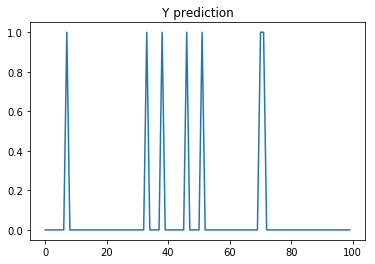

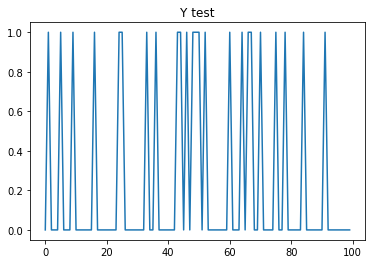

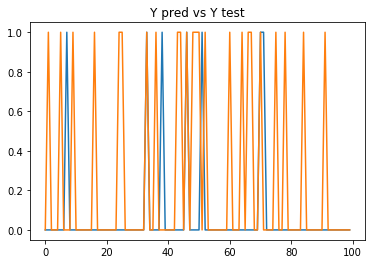

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Y prediction")
plt.plot(ypred_lr_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_lr_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

From above 3 plots we can identify the pattern how actual test data is and how our model has predicted.

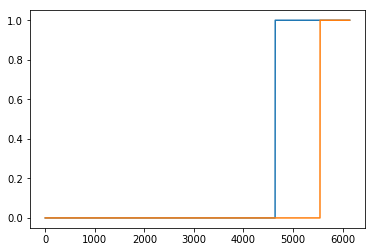

In [108]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(ypred_lr_test))

From above plot we can see that model has predicted very less positives than they actually are.

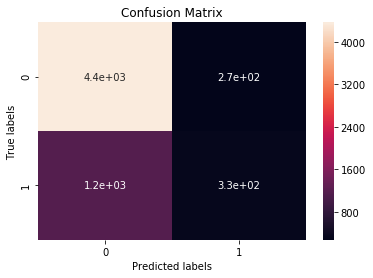

In [109]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

From above plot of confusion matrix we can visually identify which cell has more values. There are more true negatives and less false positives, true positives.

In [110]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lr_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

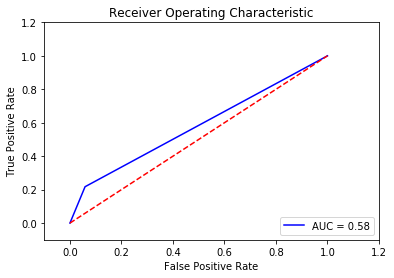

In [111]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Above plot is true positive rate against false positive rate at various thresholds. It achieved AUC value of 0.58.

In [112]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3) 

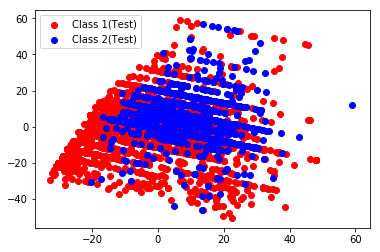

In [113]:
transformed = pd.DataFrame(pca.fit_transform(XTest))
t0 = np.array(y_test==0)
t1 = np.array(y_test==1)
plt.scatter(transformed[t0][0], transformed[t0][1], label='Class 1(Test)', c='red')
plt.scatter(transformed[t1][0], transformed[t1][1], label='Class 2(Test)', c='blue')
plt.legend()

Above plot is of test data that is dimensionally reduced using PCA. Blue colour defines actual positive class, Red colour defines actual negative class.

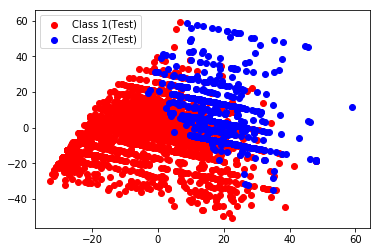

In [114]:
transformed = pd.DataFrame(pca.fit_transform(XTest))
t0 = np.array(ypred_lr_test==0)
t1 = np.array(ypred_lr_test==1)
plt.scatter(transformed[t0][0], transformed[t0][1], label='Class 1(Test)', c='red')
plt.scatter(transformed[t1][0], transformed[t1][1], label='Class 2(Test)', c='blue')
plt.legend()

Above plot is of test data that is dimensionally reduced using PCA. Blue colour defines predicted positive class, Red colour defines predicted negative class.

By comparing this plot with above plot we can see that in second plot model has predicted very less actual postives compared to prior plot.

### Discussion about Evaluation metrics

Confusion matrix: array([[4367,  272],[1178,  327]], dtype=int64)

Precision: 0.54

Recall: 0.21

Specificity: 0.94

ROC AUC Score: 0.57

Accuracy: 0.76

F1 score: 0.31

From above results we can see that it achieved good precision and bad recall values. That means it predicted very less false positives which is good thing and very large false negatives. Precision and recall are trade off. This model has achieved AUC score of 0.57, F1 of 0.31 which is not much impressive.

### Discussion about Train and Test accuracies

Train accuracy: 0.75, Train F1: 0.29

Test accuracy: 0.76, Test F1: 0.31

From above results we can say that model is not overfitting. It has achieved similar accuracy and F1 score both on train and test data. Its even working better on test data because F1 score has improved from 0.29 to 0.31.

## Discussions about Classification model comparision

Pocket Algorithm: Precision - 0.37, Recall - 0.72, Specificity - 0.62, AUC - 0.67, Accuracy - 0.64, F1 score - 0.49

QDA Algorithm: Precision - 0.49, Recall - 0.74, Specificity - 0.75, AUC - 0.74, Accuracy - 0.75, F1 score - 0.59

LDA Algorithm: Precision - nan, Recall - 0.0, Specificity - 1.0, AUC - 0.5, Accuracy - 0.75, F1 score - 0.0

Logistic Regression: Precision - 0.54, Recall - 0.21, Specificity - 0.94, AUC - 0.57, Accuracy - 0.76, F1 score - 0.31

From above results we can clearly see that QDA algorithm is achieving better results compared to other models with Pocket algorithm performing second best considering AUC score, F1 score. AUC score, F1 are used for evaluation because data is very unbalanced and prediction of each class is important. F1 score is calculated considering both precision and recall. Accuracy cannot be used for evaluation of model in such cases. LDA algorithm is performing worst among 4 models. When we look at precision values of 4 models Logistic regression achieves best precision which means its correctly predicting postive labels better than others. Recall value of QDA algorithm is highest compared to others. This means its very rarely predicting False negatives. Overall QDA model is performing best and LDA model performing worst.

# Conclusions

I think QDA model has worked extensively well on comparision with other models. It has achieved very good evaluation scores even though the data is imbalanced. 

This Assignment helped me to understand the implenetation of Pocket, QDA, LDA, Logistic regression algorithms. This has helped me a lot to improve my math, statistics knowledge. I understood the real math, theory running behind classification algorithms. I also learned which evaluation metric can be used for evaluation of model when data is balanced and imbalanced. I learned analyzing the model from its evaluation metric values, like what precision, recall, F1, AUC score mean for the model. I learned which kind of plots for results are more helpful in understanding the model performance. From extra credit question i learned how importance is cross validation as the accuracies may vary. 

Few challenges i faced in this Assignments are dimensional error issues while calculating dot products. Also Pocket algorithm is taking lot of time to train on whole train data. I also faced challenges in data cleaning process as there were lot of categorical variables. 

#### Cross Validation

In [115]:
adult_data.shape

(30718, 10)

In [116]:
df1=adult_data.iloc[0:6143,:]
df2=adult_data.iloc[6143:12286,:]
df3=adult_data.iloc[12286:18429,:]
df4=adult_data.iloc[18429:24572,:]
df5=adult_data.iloc[24572:,:]

In [117]:
test1=df1
train1=pd.concat([df2,df3,df4,df5])

In [118]:
test2=df2
train2=pd.concat([df1,df3,df4,df5])

In [119]:
test3=df3
train3=pd.concat([df1,df2,df4,df5])

In [120]:
test4=df4
train4=pd.concat([df1,df2,df3,df5])

In [121]:
test5=df5
train5=pd.concat([df1,df2,df3,df4])

#### Pocket

##### test 1

In [122]:
scaler = StandardScaler()
y_test=test1['income']
y_train=train1['income']
X_train=train1.drop(['income'],axis=1)
X_test=test1.drop(['income'],axis=1)

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [123]:
pocket1=Pocket()

In [124]:
pocket1.train(X_train,y_train)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  4
[ 0.00399091 -0.00082118  0.00404248  0.00593185  0.00301905  0.00293211
 -0.03894556  0.00157519  0.01241426]


In [125]:
ypred_p=pocket.use(X_test)

In [126]:
print('Accuracy:', accuracy_score(y_test,ypred_p))
print('F1 score:', f1_score(y_test,ypred_p))

Accuracy: 0.6635194530359759
F1 score: 0.6325333333333333


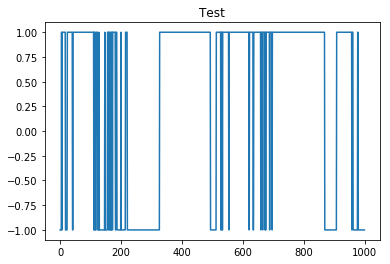

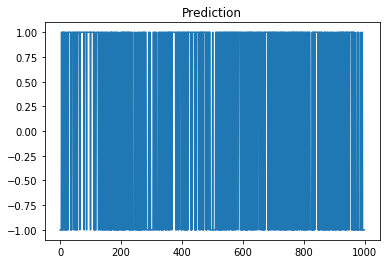

In [127]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_p[0:1000])
plt.show()

##### test 2

In [128]:
scaler = StandardScaler()
y_test=test2['income']
y_train=train2['income']
X_train=train2.drop(['income'],axis=1)
X_test=test2.drop(['income'],axis=1)

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

pocket1.train(X_train,y_train)
ypred_p=pocket.use(X_test)
print('Accuracy:', accuracy_score(y_test,ypred_p))
print('F1 score:', f1_score(y_test,ypred_p))

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  4
[ 0.02802329  0.03835359  0.00366332 -0.0029596   0.00859898 -0.00994608
 -0.00045678  0.00993978  0.04605982]
Accuracy: 0.6288458407944001
F1 score: 0.42043721403152


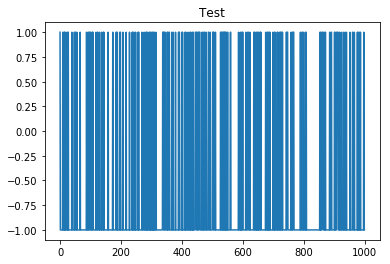

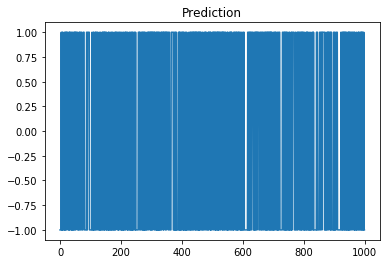

In [129]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_p[0:1000])
plt.show()

##### test 3

In [130]:
scaler = StandardScaler()
y_test=test3['income']
y_train=train3['income']
X_train=train3.drop(['income'],axis=1)
X_test=test3.drop(['income'],axis=1)

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

pocket1.train(X_train,y_train)
ypred_p=pocket.use(X_test)
print('Accuracy:', accuracy_score(y_test,ypred_p))
print('F1 score:', f1_score(y_test,ypred_p))

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  4
[ 0.00906671  0.05438621  0.00051227 -0.01197495  0.00061983 -0.00499334
  0.00457799  0.01014617  0.00647159]
Accuracy: 0.6290086277063324
F1 score: 0.43963609540201626


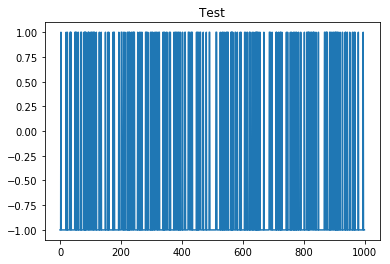

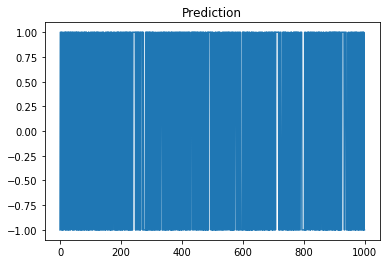

In [131]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_p[0:1000])
plt.show()

##### test 4

In [132]:
scaler = StandardScaler()
y_test=test4['income']
y_train=train4['income']
X_train=train4.drop(['income'],axis=1)
X_test=test4.drop(['income'],axis=1)

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

pocket1.train(X_train,y_train)
ypred_p=pocket.use(X_test)
print('Accuracy:', accuracy_score(y_test,ypred_p))
print('F1 score:', f1_score(y_test,ypred_p))

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  4
[ 0.01449665  0.03265633  0.00544158 -0.00035217  0.00902524  0.00129114
  0.00045832  0.0126964   0.05331192]
Accuracy: 0.6360084649194204
F1 score: 0.44516129032258067


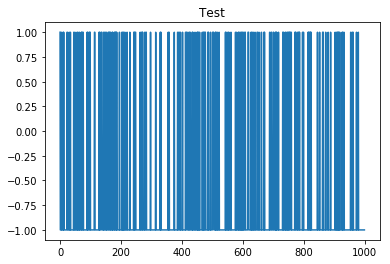

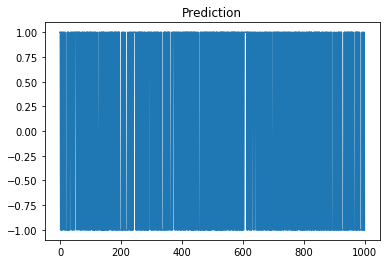

In [133]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_p[0:1000])
plt.show()

##### test 5

In [134]:
scaler = StandardScaler()
y_test=test5['income']
y_train=train5['income']
X_train=train5.drop(['income'],axis=1)
X_test=test5.drop(['income'],axis=1)

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

pocket1.train(X_train,y_train)
ypred_p=pocket.use(X_test)
print('Accuracy:', accuracy_score(y_test,ypred_p))
print('F1 score:', f1_score(y_test,ypred_p))

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  4
[ 0.0165785   0.04389234 -0.00074444 -0.0007945  -0.00088554 -0.0062486
  0.00279372  0.00444022  0.00748119]
Accuracy: 0.6319557435730556
F1 score: 0.4431314623338257


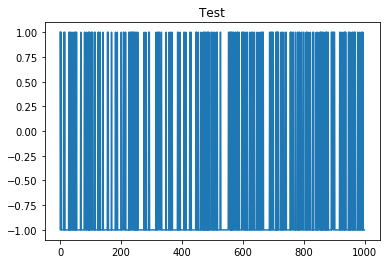

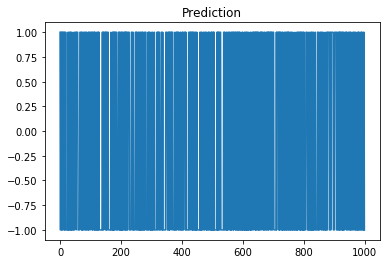

In [135]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_p[0:1000])
plt.show()

Test 1: Accuracy - 0.66, F1 - 0.63

Test 2: Accuracy - 0.62, F1 - 0.42

Test 3: Accuracy - 0.62, F1 - 0.43

Test 4: Accuracy - 0.63, F1 - 0.44

Test 5: Accuracy - 0.63, F1 - 0.44

From above results we can say that in test 1  F1 is very high compared to other 4 tests. All other four tests has achieved similar accuracy and F1 score. 

#### QDA

##### test 1

In [136]:
y_test=test1['income']
y_train=train1['income']
X_train=train1.drop(['income'],axis=1)
X_test=test1.drop(['income'],axis=1)

qda=QDA1()
qda.train(X_train,y_train)
ypred_qda_test,d1,d2=qda1.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_qda_test))
print('F1 score:', f1_score(y_test, ypred_qda_test))

Accuracy: 0.7318899560475338
F1 score: 0.6999453452359264


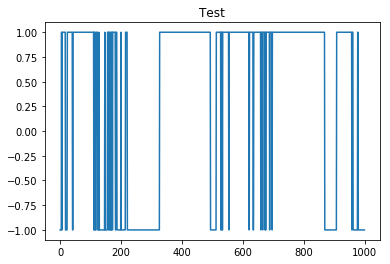

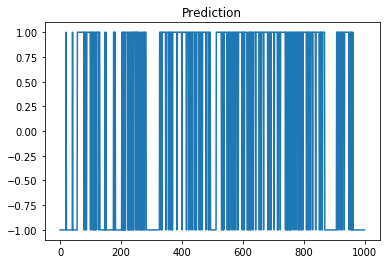

In [137]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_qda_test[0:1000])
plt.show()

#### test 2

In [138]:
y_test=test2['income']
y_train=train2['income']
X_train=train2.drop(['income'],axis=1)
X_test=test2.drop(['income'],axis=1)

qda=QDA1()
qda.train(X_train,y_train)
ypred_qda_test,d1,d2=qda1.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_qda_test))
print('F1 score:', f1_score(y_test, ypred_qda_test))

Accuracy: 0.766237994465245
F1 score: 0.5611246943765281


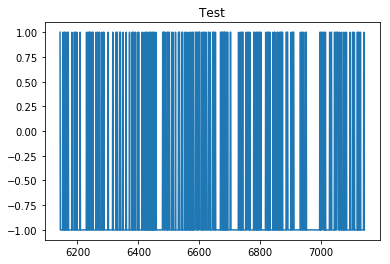

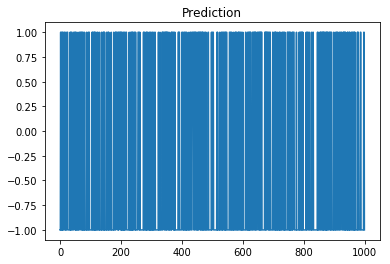

In [139]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_qda_test[0:1000])
plt.show()

##### test 3

In [140]:
y_test=test3['income']
y_train=train3['income']
X_train=train3.drop(['income'],axis=1)
X_test=test3.drop(['income'],axis=1)

qda=QDA1()
qda.train(X_train,y_train)
ypred_qda_test,d1,d2=qda1.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_qda_test))
print('F1 score:', f1_score(y_test, ypred_qda_test))

Accuracy: 0.7543545498941885
F1 score: 0.5502235469448583


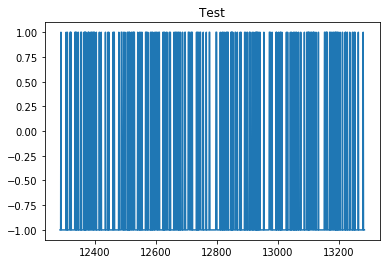

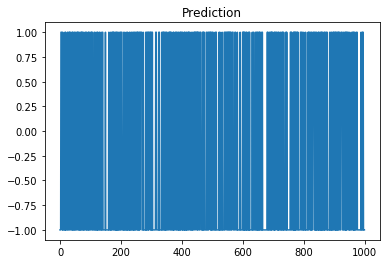

In [141]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_qda_test[0:1000])
plt.show()

##### test 4

In [142]:
y_test=test4['income']
y_train=train4['income']
X_train=train4.drop(['income'],axis=1)
X_test=test4.drop(['income'],axis=1)

qda=QDA1()
qda.train(X_train,y_train)
ypred_qda_test,d1,d2=qda1.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_qda_test))
print('F1 score:', f1_score(y_test, ypred_qda_test))

Accuracy: 0.7605404525476152
F1 score: 0.5543774613753408


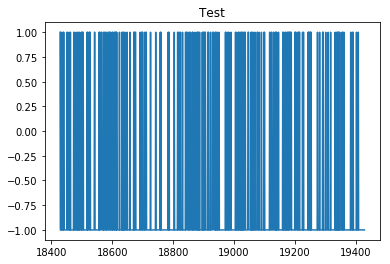

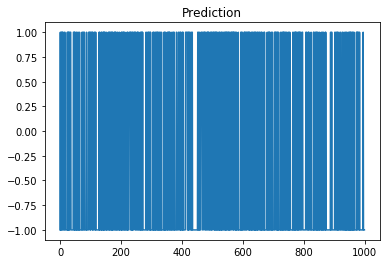

In [143]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_qda_test[0:1000])
plt.show()

##### test 5

In [144]:
y_test=test5['income']
y_train=train5['income']
X_train=train5.drop(['income'],axis=1)
X_test=test5.drop(['income'],axis=1)

qda=QDA1()
qda.train(X_train,y_train)
ypred_qda_test,d1,d2=qda1.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_qda_test))
print('F1 score:', f1_score(y_test, ypred_qda_test))

Accuracy: 0.7593556784900748
F1 score: 0.5573181682131099


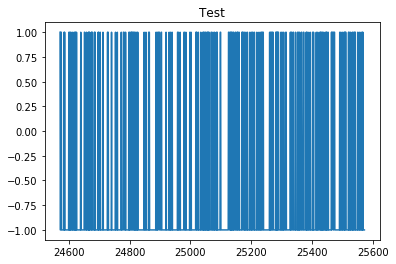

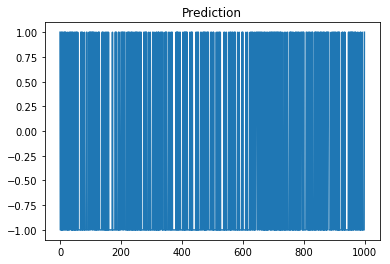

In [145]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_qda_test[0:1000])
plt.show()

Test 1: Accuracy - 0.73, F1 - 0.69

Test 2: Accuracy - 0.76, F1 - 0.56

Test 3: Accuracy - 0.75, F1 - 0.55

Test 4: Accuracy - 0.76, F1 - 0.55

Test 5: Accuracy - 0.75, F1 - 0.55

From above results we can say that in test 1  F1 is very high compared to other 4 tests. All other four tests has achieved similar accuracy and F1 score. 

#### LDA

##### test 1

In [146]:
y_test=test1['income']
y_train=train1['income']
X_train=train1.drop(['income'],axis=1)
X_test=test1.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=lda.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.5411036952629008
F1 score: 0.0


C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


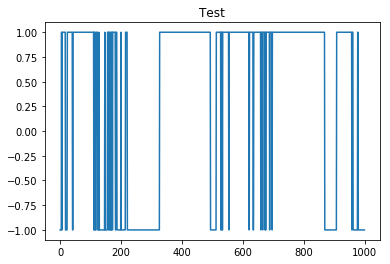

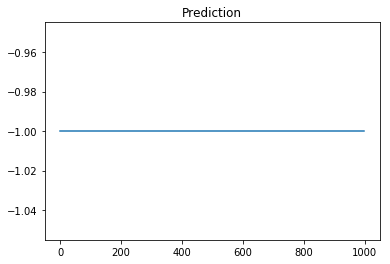

In [147]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:1000])
plt.show()

##### test 2

In [148]:
y_test=test2['income']
y_train=train2['income']
X_train=train2.drop(['income'],axis=1)
X_test=test2.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=lda.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.808562591567638
F1 score: 0.0


C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


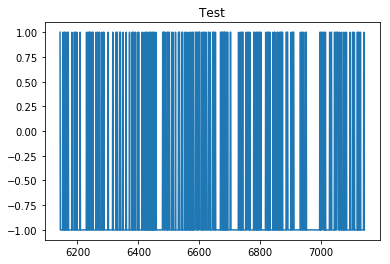

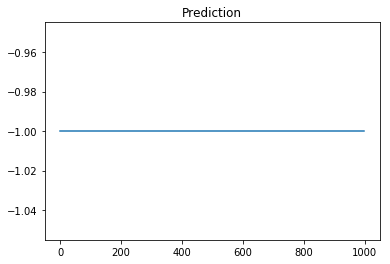

In [149]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:1000])
plt.show()

##### test 3

In [150]:
y_test=test3['income']
y_train=train3['income']
X_train=train3.drop(['income'],axis=1)
X_test=test3.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=lda.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.802213902002279
F1 score: 0.0


C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


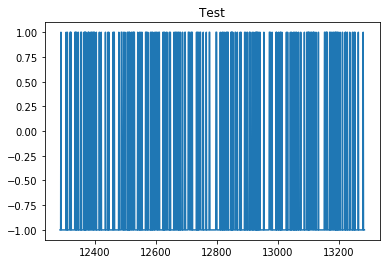

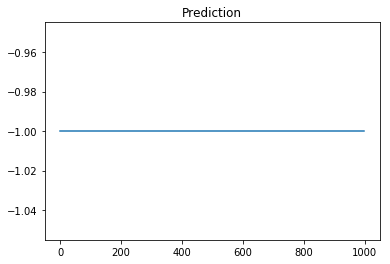

In [151]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:1000])
plt.show()

##### test 4

In [152]:
y_test=test4['income']
y_train=train4['income']
X_train=train4.drop(['income'],axis=1)
X_test=test4.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=lda.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.8023766889142113
F1 score: 0.0


C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


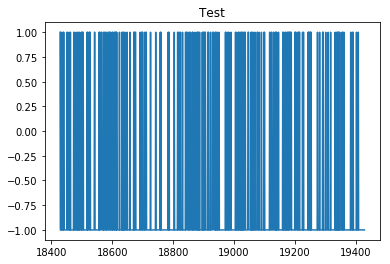

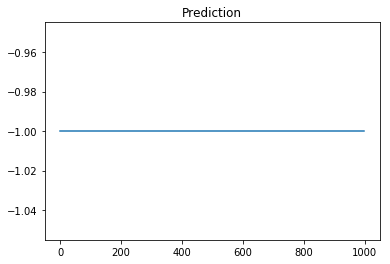

In [153]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:1000])
plt.show()

##### test 5

In [154]:
y_test=test5['income']
y_train=train5['income']
X_train=train5.drop(['income'],axis=1)
X_test=test5.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=lda.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.8005206638464042
F1 score: 0.0


C:\Users\jayac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


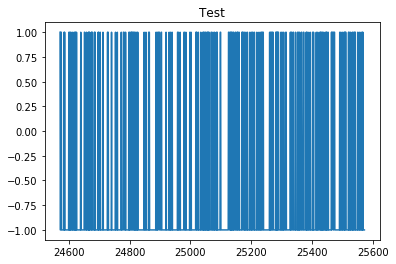

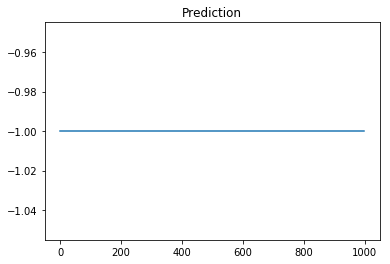

In [155]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:1000])
plt.show()

Test 1: Accuracy - 0.54, F1 - 0.00

Test 2: Accuracy - 0.80, F1 - 0.00

Test 3: Accuracy - 0.80, F1 - 0.00

Test 4: Accuracy - 0.80, F1 - 0.00

Test 5: Accuracy - 0.80, F1 - 0.00

From above results we can say that in test 1 Accuracy is very less compared to other 4 tests. All other four tests has achieved similar accuracy. 

#### Logistic regression

##### test 1

In [156]:
y_test=test1['income']
y_train=train1['income']
X_train=train1.drop(['income'],axis=1)
X_test=test1.drop(['income'],axis=1)

lr = Logistic(0.0001)
lr.train(X_train[:],np.array(y_train[:]))
ypred_lr_test = lr.use(X_test[:])
ypred_lr_test = np.argmax(ypred_lr_test, 1)
y_test=np.array(y_test)
y_test=np.where(y_test==-1,0,1)
print('Accuracy:', accuracy_score(y_test, ypred_lr_test))
print('F1 score:', f1_score(y_test, ypred_lr_test))

Accuracy: 0.5523359921862282
F1 score: 0.07407407407407407


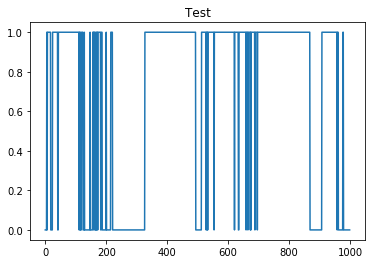

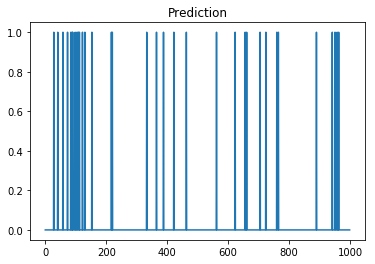

In [157]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lr_test[0:1000])
plt.show()

##### test 2

In [158]:
y_test=test2['income']
y_train=train2['income']
X_train=train2.drop(['income'],axis=1)
X_test=test2.drop(['income'],axis=1)

lr = Logistic(0.0001)
lr.train(X_train[:],np.array(y_train[:]))
ypred_lr_test = lr.use(X_test[:])
ypred_lr_test = np.argmax(ypred_lr_test, 1)
y_test=np.array(y_test)
y_test=np.where(y_test==-1,0,1)
print('Accuracy:', accuracy_score(y_test, ypred_lr_test))
print('F1 score:', f1_score(y_test, ypred_lr_test))

Accuracy: 0.7926094741982744
F1 score: 0.32089552238805974


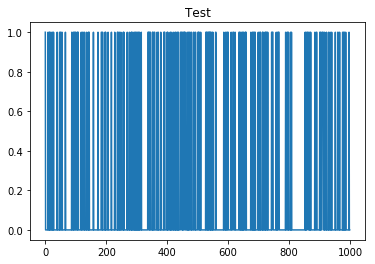

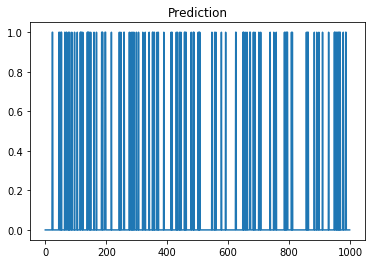

In [159]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lr_test[0:1000])
plt.show()

##### test 3

In [160]:
y_test=test3['income']
y_train=train3['income']
X_train=train3.drop(['income'],axis=1)
X_test=test3.drop(['income'],axis=1)

lr = Logistic(0.0001)
lr.train(X_train[:],np.array(y_train[:]))
ypred_lr_test = lr.use(X_test[:])
ypred_lr_test = np.argmax(ypred_lr_test, 1)
y_test=np.array(y_test)
y_test=np.where(y_test==-1,0,1)
print('Accuracy:', accuracy_score(y_test, ypred_lr_test))
print('F1 score:', f1_score(y_test, ypred_lr_test))

Accuracy: 0.7862607846329155
F1 score: 0.32701178882624293


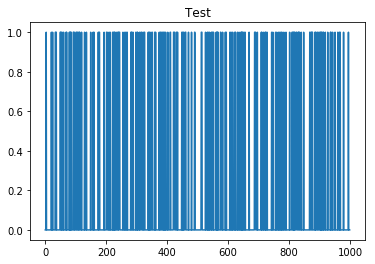

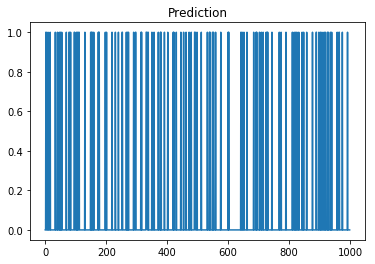

In [161]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lr_test[0:1000])
plt.show()

##### test 4

In [162]:
y_test=test4['income']
y_train=train4['income']
X_train=train4.drop(['income'],axis=1)
X_test=test4.drop(['income'],axis=1)

lr = Logistic(0.0001)
lr.train(X_train[:],np.array(y_train[:]))
ypred_lr_test = lr.use(X_test[:])
ypred_lr_test = np.argmax(ypred_lr_test, 1)
y_test=np.array(y_test)
y_test=np.where(y_test==-1,0,1)
print('Accuracy:', accuracy_score(y_test, ypred_lr_test))
print('F1 score:', f1_score(y_test, ypred_lr_test))

Accuracy: 0.7934234087579358
F1 score: 0.3428275504919731


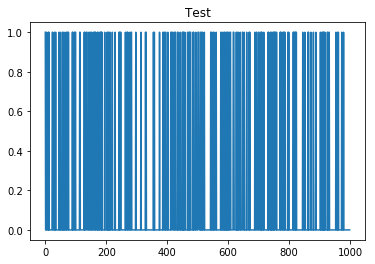

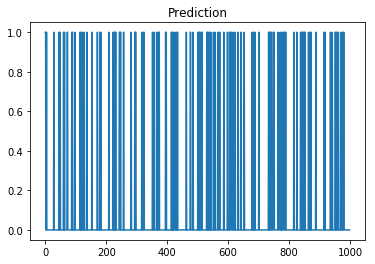

In [163]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lr_test[0:1000])
plt.show()

##### test 5

In [164]:
y_test=test5['income']
y_train=train5['income']
X_train=train5.drop(['income'],axis=1)
X_test=test5.drop(['income'],axis=1)

lr = Logistic(0.0001)
lr.train(X_train[:],np.array(y_train[:]))
ypred_lr_test = lr.use(X_test[:])
ypred_lr_test = np.argmax(ypred_lr_test, 1)
y_test=np.array(y_test)
y_test=np.where(y_test==-1,0,1)
print('Accuracy:', accuracy_score(y_test, ypred_lr_test))
print('F1 score:', f1_score(y_test, ypred_lr_test))

Accuracy: 0.7941750732183535
F1 score: 0.3442198030067392


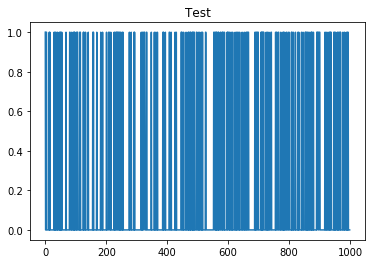

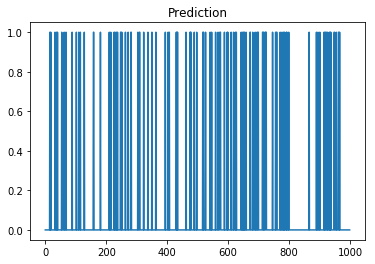

In [165]:
plt.title("Test")
plt.plot(y_test[0:1000])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lr_test[0:1000])
plt.show()

Test 1: Accuracy - 0.55, F1 - 0.07

Test 2: Accuracy - 0.79, F1 - 0.32

Test 3: Accuracy - 0.78, F1 - 0.32

Test 4: Accuracy - 0.79, F1 - 0.34

Test 5: Accuracy - 0.79, F1 - 0.34

From above results we can say that in test 1 F1 score is very high compared to other 4 tests. All other four tests has achieved similar accuracy and F1 score. 

##### Observation
For all the above models test 1 Accuracy, F1  vary very high compared to other 4 tests. All other four tests has achieved similar accuracy and F1 score. From the figures above plotted we identify the difference in how test 1 data is varied in comparision all other tests. That is the reason why there is huge difference in accuracies, F1 score. Cross validation can be used to check how the model is working outside the sample on new data. Difference in accuracies between test 1 and others may be due to unstratified division of data. Cross validation can also help us identify accidentally oocured high accuracy values like in test 1 case.